## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**ACTIVIDAD 1**

In [2]:
import zipfile
import os
import shutil

# Ruta del archivo
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/archive (2).zip'

# Ruta de extracción
extract_folder_path = '/content/chest_xray/'

if os.path.exists(extract_folder_path):
    shutil.rmtree(extract_folder_path)

# Descomprimir el archivo
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

# Estructura de archivos descomprimidos
print("Estructura de archivos después de la descompresión:")
print(os.listdir(extract_folder_path))

if 'chest_xray' in os.listdir(extract_folder_path):
    chest_xray_dir = os.path.join(extract_folder_path, 'chest_xray')

    for folder in ['train', 'test', 'val']:
        shutil.move(os.path.join(chest_xray_dir, folder), extract_folder_path)

    shutil.rmtree(chest_xray_dir)

# Nueva estructura de archivos
print("Estructura después de mover las carpetas:")
print(os.listdir(extract_folder_path))


Estructura de archivos después de la descompresión:
['chest_xray']
Estructura después de mover las carpetas:
['val', 'test', 'train']


In [3]:
##CONTAR IMAGENES POR CLASE
import os

# Definir las rutas de las carpetas
train_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'
val_dir = '/content/chest_xray/val'

# Fx para contar las imágenes por clase
def count_images_in_folder(folder_path):
    # Contar las subcarpetas (por clase)
    classes = os.listdir(folder_path)
    image_counts = {cls: len(os.listdir(os.path.join(folder_path, cls))) for cls in classes}
    return image_counts

# Contar las imágenes en cada conjunto de datos
train_counts = count_images_in_folder(train_dir)
test_counts = count_images_in_folder(test_dir)
val_counts = count_images_in_folder(val_dir)

# Resultados
print("Imágenes en el conjunto de entrenamiento:", train_counts)
print("Imágenes en el conjunto de prueba:", test_counts)
print("Imágenes en el conjunto de validación:", val_counts)


Imágenes en el conjunto de entrenamiento: {'NORMAL': 1341, 'PNEUMONIA': 3875}
Imágenes en el conjunto de prueba: {'NORMAL': 234, 'PNEUMONIA': 390}
Imágenes en el conjunto de validación: {'NORMAL': 8, 'PNEUMONIA': 8}


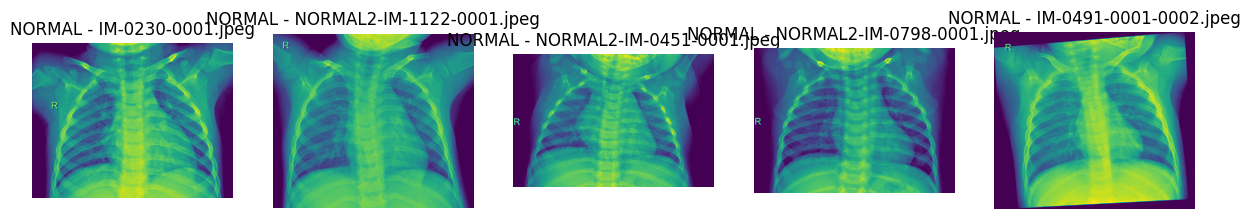

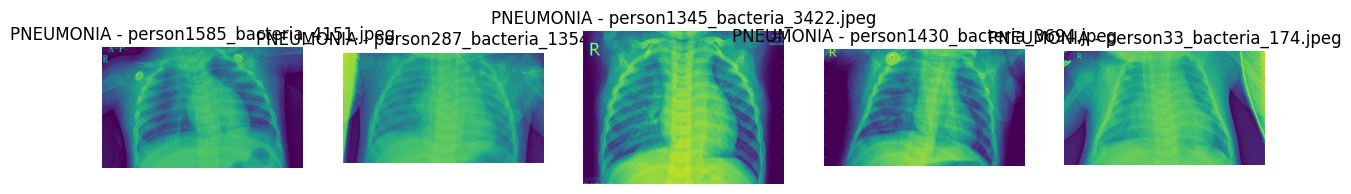

In [4]:
##VISUALIZAR IMAGENES ALEATORIAS
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Fx para mostrar imágenes aleatorias de una carpeta
def show_random_images(folder_path, class_name, n_images=5):
    class_folder = os.path.join(folder_path, class_name)
    images = os.listdir(class_folder)

    #  n imágenes aleatorias
    random_images = random.sample(images, n_images)

    # Mostrar imágenes
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(random_images):
        img_path = os.path.join(class_folder, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, n_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{class_name} - {img_name}')

    plt.show()

# Mostrar imágenes aleatorias de las clases 'NORMAL' y 'PNEUMONIA' en el conjunto de entrenamiento
show_random_images(train_dir, 'NORMAL')
show_random_images(train_dir, 'PNEUMONIA')


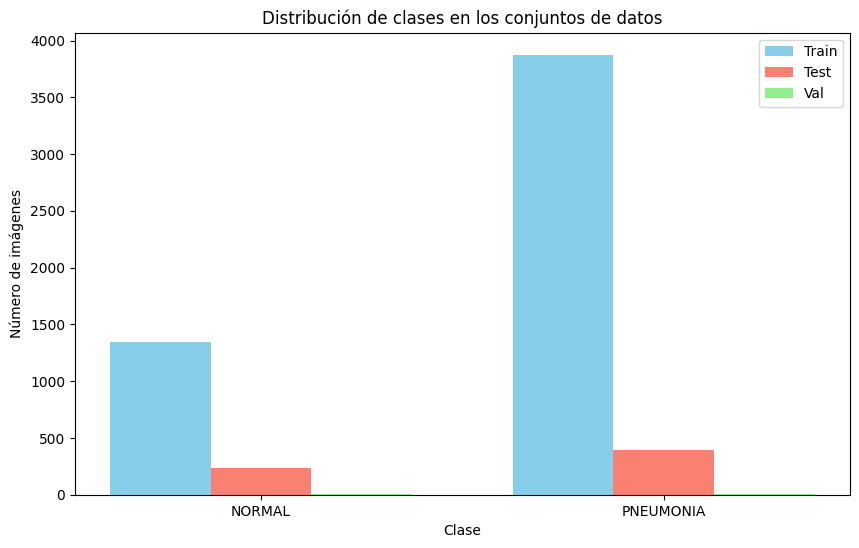

In [5]:
##DISTRIBUCION DE CLASES
import matplotlib.pyplot as plt

# Función para plotear la distribución de clases
def plot_class_distribution(train_counts, test_counts, val_counts):
    # Nombres
    labels = ['NORMAL', 'PNEUMONIA']
    colors = ['skyblue', 'salmon']

    # Contar  imágenes por clase para cada conjunto de datos
    train_class_counts = [train_counts['NORMAL'], train_counts['PNEUMONIA']]
    test_class_counts = [test_counts['NORMAL'], test_counts['PNEUMONIA']]
    val_class_counts = [val_counts['NORMAL'], val_counts['PNEUMONIA']]

    # Crear gráfico de barras
    x = range(len(labels))  # Posición de las clases en el eje x
    width = 0.25  # Ancho de las barras

    plt.figure(figsize=(10, 6))

    # Graficar las barras para cada conjunto de datos
    plt.bar(x, train_class_counts, width, label='Train', color=colors[0])
    plt.bar([p + width for p in x], test_class_counts, width, label='Test', color=colors[1])
    plt.bar([p + width*2 for p in x], val_class_counts, width, label='Val', color='lightgreen')

    # Configuración gráfico
    plt.xlabel('Clase')
    plt.ylabel('Número de imágenes')
    plt.title('Distribución de clases en los conjuntos de datos')
    plt.xticks([p + width for p in x], labels)
    plt.legend()
    plt.show()

# Plotear distribución de clases
plot_class_distribution(train_counts, test_counts, val_counts)



In [6]:
##PREPROCESAMIENTO DE IMAGENES
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador de datos para aumentar imágenes
datagen = ImageDataGenerator(rescale=1./255,  # NORMALIZACIÓN pixeles
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Generador de datos para el conjunto de entrenamiento
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Generador para validación y prueba
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**ACTIVIDAD 2**
Se usará el modelo de red neuronal convolucional (CNN), ya que es eficaz para tareas de clasificación de imágenes, como lo es en este caso.

In [7]:
#Librerias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Dimensiones de la imagen
image_size = (150, 150)


In [8]:
# Modelo de CNN
model = Sequential()

# Capa convolucional (filtro 32, tamaño 3x3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Capa convolucional (filtro 64, tamaño 3x3)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Capa convolucional (filtro 128, tamaño 3x3)
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Aplanar las capas
model.add(Flatten())

# Capa densa con 128 neuronas
model.add(Dense(128, activation='relu'))

# Capa de salida con 1 neurona (ya que es un problema de clasificación binaria)
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
##ENTRENAMIENTO DEL MODELO
#  EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping]
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.7624 - loss: 0.5397 - val_accuracy: 0.8125 - val_loss: 0.5144
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.8494 - loss: 0.3183 - val_accuracy: 0.8125 - val_loss: 0.4682
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.8786 - loss: 0.2793 - val_accuracy: 0.7500 - val_loss: 0.5697
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.8784 - loss: 0.2736 - val_accuracy: 0.6250 - val_loss: 1.0745
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - accuracy: 0.9045 - loss: 0.2325 - val_accuracy: 0.8125 - val_loss: 0.4434
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.8839 - loss: 0.2612 - val_accuracy: 0.8750 - val_loss: 0.6423
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.9052 - loss: 0.2046 - val_accuracy: 0.8125 - val_loss: 0.6080
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.9173 - loss: 0.2006 - val_accuracy: 0.750

In [10]:
# Ver la historia del entrenamiento y la validación
print("Historial de entrenamiento:")
print("Pérdida de entrenamiento:", history.history['loss'])
print("Precisión de entrenamiento:", history.history['accuracy'])
print("Pérdida de validación:", history.history['val_loss'])
print("Precisión de validación:", history.history['val_accuracy'])

# Ver la precisión y la pérdida en la época 6
epoch_6_accuracy = history.history['accuracy'][5]
epoch_6_val_accuracy = history.history['val_accuracy'][5]
epoch_6_loss = history.history['loss'][5]
epoch_6_val_loss = history.history['val_loss'][5]

print(f"\n--- Resultados en la época 6 ---")
print(f"Precisión de entrenamiento en la época 6: {epoch_6_accuracy:.4f}")
print(f"Precisión de validación en la época 6: {epoch_6_val_accuracy:.4f}")
print(f"Pérdida de entrenamiento en la época 6: {epoch_6_loss:.4f}")
print(f"Pérdida de validación en la época 6: {epoch_6_val_loss:.4f}")


Historial de entrenamiento:
Pérdida de entrenamiento: [0.45756351947784424, 0.31730058789253235, 0.27080777287483215, 0.2599160671234131, 0.2227822095155716, 0.23486778140068054, 0.2036958932876587, 0.20572704076766968]
Precisión de entrenamiento: [0.7912193536758423, 0.85429447889328, 0.8805598020553589, 0.8849693536758423, 0.9050996899604797, 0.8978143930435181, 0.9131518602371216, 0.912193238735199]
Pérdida de validación: [0.5143617391586304, 0.46823471784591675, 0.56974196434021, 1.0744593143463135, 0.4434152841567993, 0.6423319578170776, 0.6079690456390381, 0.484520822763443]
Precisión de validación: [0.8125, 0.8125, 0.75, 0.625, 0.8125, 0.875, 0.8125, 0.75]

--- Resultados en la época 6 ---
Precisión de entrenamiento en la época 6: 0.8978
Precisión de validación en la época 6: 0.8750
Pérdida de entrenamiento en la época 6: 0.2349
Pérdida de validación en la época 6: 0.6423


In [11]:
## EVALUAR EL MODELO
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Loss en test: {test_loss:.4f}")
print(f"Accuracy en test: {test_accuracy:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 741ms/step - accuracy: 0.8633 - loss: 0.3118
Loss en test: 0.3260
Accuracy en test: 0.8606


In [12]:
##GENERAR PREDICCIONES
# Realizar predicciones en el conjunto de test
import numpy as np
from tensorflow.keras.preprocessing import image

# Seleccionar una imagen aleatoria del conjunto de test
test_image_path = '/content/chest_xray/test/PNEUMONIA/person104_bacteria_491.jpeg'  # Aquí pones la ruta de una imagen de test

# Cargar y preprocesar la imagen
img = image.load_img(test_image_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Añadir batch dimension
img_array /= 255.0  # Normalizar

# Realizar la predicción
prediction = model.predict(img_array)
print("Predicción (0: Normal, 1: Neumonía):", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicción (0: Normal, 1: Neumonía): [[0.98644584]]


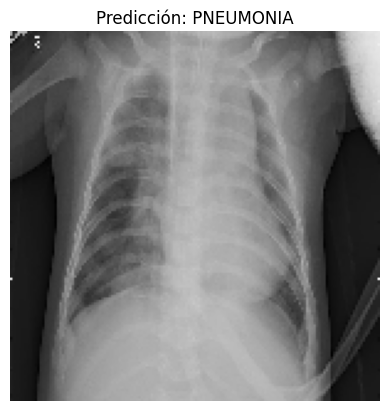

In [13]:
# Mostrar la imagen
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicción: {'PNEUMONIA' if prediction[0] > 0.5 else 'NORMAL'}")
plt.show()


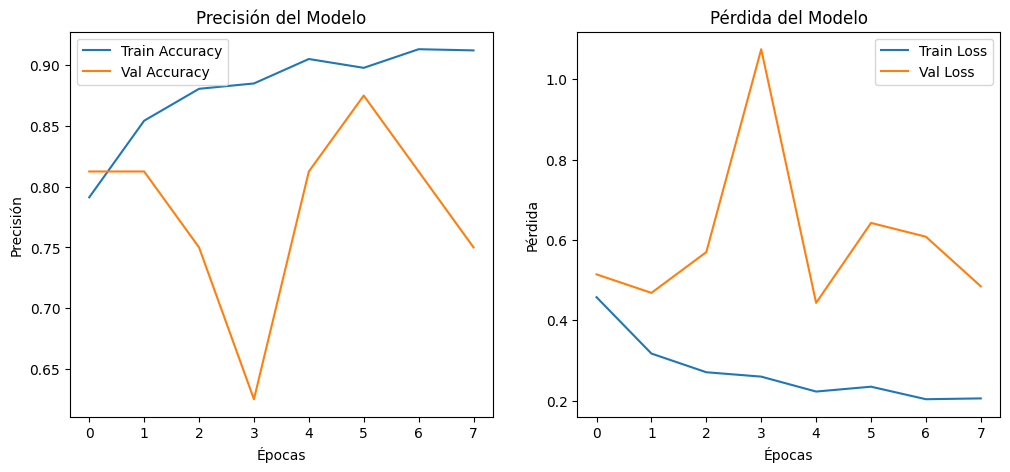

In [14]:
# Graficar la precisión y pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


**ACTIVIDAD 3**

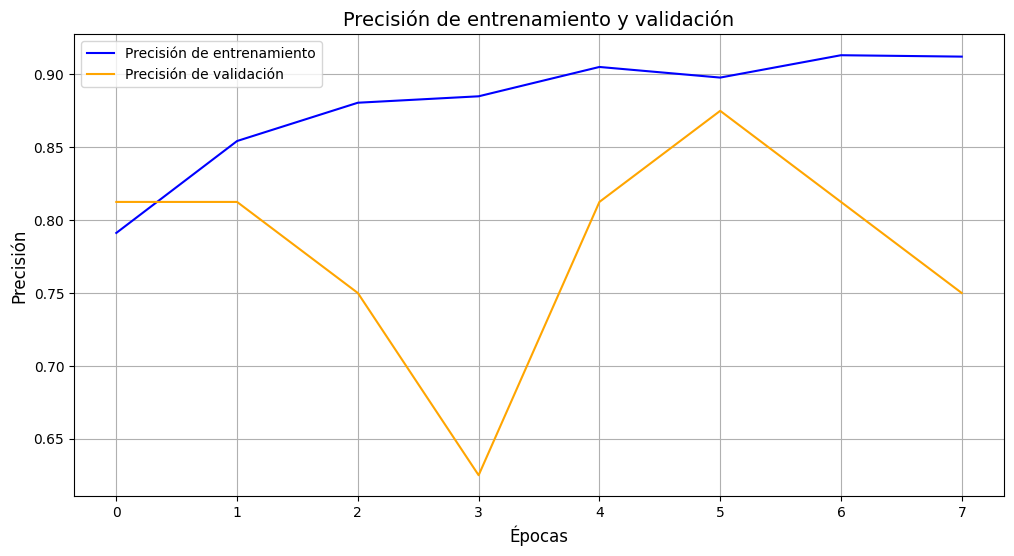

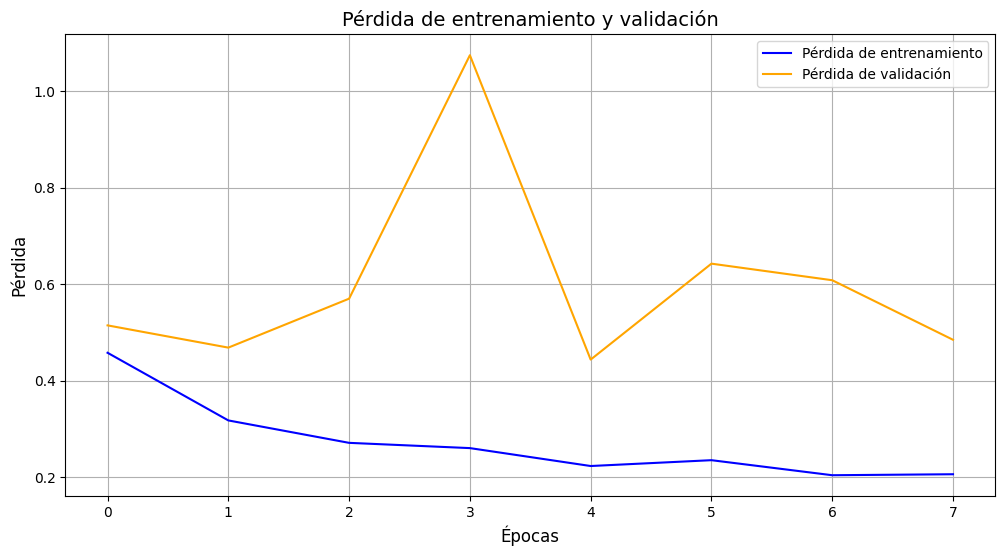

In [15]:
##GRAFICAS DE RENDIMIENTO
import matplotlib.pyplot as plt

# Gráfica de precisión vs épocas
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento', color='blue')
plt.plot(history.history['val_accuracy'], label='Precisión de validación', color='orange')
plt.title('Precisión de entrenamiento y validación', fontsize=14)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Gráfica de pérdida vs épocas
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida de validación', color='orange')
plt.title('Pérdida de entrenamiento y validación', fontsize=14)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 735ms/step


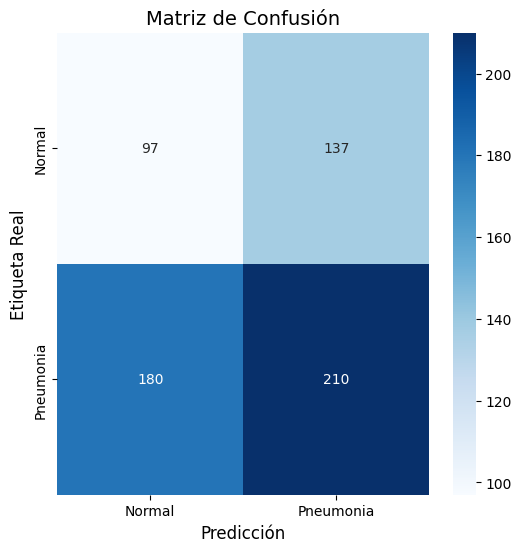


Reporte de Clasificación:
              precision    recall  f1-score   support

      Normal       0.35      0.41      0.38       234
   Pneumonia       0.61      0.54      0.57       390

    accuracy                           0.49       624
   macro avg       0.48      0.48      0.47       624
weighted avg       0.51      0.49      0.50       624

19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 744ms/step - accuracy: 0.8833 - loss: 0.3091
Precisión en Test: 86.18%
Pérdida en Test: 0.3259


In [16]:
##METRICAS DE RENDIMIENTO - MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones sobre las imágenes de test
test_predictions = (model.predict(test_generator) > 0.5).astype("int32")

# Obtener etiquetas
true_labels = test_generator.classes  # Las etiquetas reales de las imágenes

# 1. Matriz de Confusión
cm = confusion_matrix(true_labels, test_predictions)

# Visualizar MC
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Matriz de Confusión', fontsize=14)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.show()

# 2. Reporte de Clasificación
print("\nReporte de Clasificación:")
report = classification_report(true_labels, test_predictions, target_names=['Normal', 'Pneumonia'])
print(report)

# 3. Evaluación modelo
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Precisión en Test: {accuracy*100:.2f}%")
print(f"Pérdida en Test: {loss:.4f}")


In [17]:
##METRICA DE RENDIMIENTO - CURVA AUC-ROC
from sklearn.metrics import roc_auc_score

# Cálculo del AUC-ROC (Área Bajo la Curva ROC)
# Predecir probabilidades
probabilities = model.predict(test_generator)
roc_auc = roc_auc_score(true_labels, probabilities)

print(f"\nÁrea bajo la curva ROC (AUC): {roc_auc:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 721ms/step

Área bajo la curva ROC (AUC): 0.4856


In [18]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

def build_simplified_model():
    model = Sequential()

    # Primera capa convolucional
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Segunda capa convolucional
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Aplanar las características
    model.add(Flatten())

    # Capa densa
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))  # Añadir dropout para regularización

    # Capa de salida
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [20]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

def build_mobilenet_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
    base_model.trainable = False  # Congelar las capas base para evitar entrenamiento

    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout para regularización
    model.add(layers.Dense(1, activation='sigmoid'))  # Salida binaria

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


**ACTIVIDAD 4**

In [33]:
# Guardar el modelo
model.save('modelo_entrenado.keras')



In [ ]:
pip install python-multipart


In [37]:
!ngrok authtoken 2oWi9hMmFEzjZOfm4EXptXyr0OW_4GfSEaS3To1kPhpEpiwDE


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install uvicorn fastapi
from fastapi import FastAPI
import uvicorn

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Hello World"}

if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)


RuntimeError: asyncio.run() cannot be called from a running event loop

In [44]:
from fastapi import FastAPI, File, UploadFile
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import io

# Crear FastAPI
app = FastAPI()

# Cargar el modelo
model = load_model('modelo_entrenado.keras')  # Reemplaza con el path correcto de tu modelo

# Ruta para hacer predicciones
@app.post("/predict/")
async def predict(file: UploadFile = File(...)):

    img_bytes = await file.read()

    img = Image.open(io.BytesIO(img_bytes))

    img = img.resize((64, 64))
    img_array = np.array(img)

    # Normalizar los valores de píxeles
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Realizar la predicción
    prediction = model.predict(img_array)

    # Convertir la predicción a una respuesta que indique el resultado
    result = 'Pneumonia' if prediction[0] > 0.5 else 'Normal'

    # Devolver el resultado como una respuesta JSON
    return {"prediction": result, "confidence": float(prediction[0])}


In [45]:
from pyngrok import ngrok

# Túnel hacia el puerto 8000
public_url = ngrok.connect(8000)

print(f" * FastAPI app is live at: {public_url}")


 * FastAPI app is live at: NgrokTunnel: "https://475b-34-169-63-196.ngrok-free.app" -> "http://localhost:8000"
